## Taller 3 - Santiago Chacón y Sergio Cobos.

#### Definición del problema
Este proyecto busca identificar las zonas de Colombia con mayor probabilidad de contagio por Infecciones Respiratorias Agudas (IRA), utilizando variables socioeconómicas, ambientales y demográficas. 

Las IRA, una de las principales causas de morbilidad y mortalidad en poblaciones vulnerables, están influenciadas por factores como la calidad del aire, el hacinamiento y el acceso a servicios de salud. Comprender estos patrones permitirá diseñar estrategias preventivas más efectivas, optimizando recursos y mejorando la salud pública en las comunidades más afectadas.

Variable objetivo: Número de contagios de IRA por municipio

Variables predictoras:

Demográficas:                                                
Población -
Porcentaje población masculina por municipio -
Porcentaje población femenina por municipio -
Porcentaje población menor de 5 años -
Porcentaje población mayor 60 años -
Porcentaje población urbana -
Densidad poblacional -

Socioeconómicas: 
Cobertura de alcantarillado y acueducto -
Tasa de analfabetismo de 15 años y mas -
Resultado en pruebas Saber (matemáticas y lectura crítica) -
Cobertura educación secundaria -
Cobertura régimen subsidiado -
Acceso a servicios básicos 

Ambientales y de salud: 
Area bosque -
Porcentaje de niñas y niños en primera infancia con valoración integral de salud

Periodo de análisis: 2018-2021

#### Construcción de base

In [152]:
!pip install pandas numpy geopandas seaborn matplotlib scikit-learn setuptools openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
pip show setuptools

Name: setuptoolsNote: you may need to restart the kernel to use updated packages.

Version: 75.6.0
Summary: Easily download, build, install, upgrade, and uninstall Python packages
Home-page: 
Author: 
Author-email: Python Packaging Authority <distutils-sig@python.org>
License: 
Location: c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: 
Required-by: 


In [154]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [156]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

Procesamiento de datos de los pacientes que tuvieron IRA en colombia (2012-2023)

In [157]:
import pandas as pd
import os
directory = "C:\\Users\\santi\\Downloads\\bases"

files = ["Datos_2018_995.xlsx", "Datos_2019_995.xlsx", "Datos_2020_995.xlsx", "Datos_2021_995.xlsx"]

Fusión y agrupación de casos de infecciones respiratorias agudas por municipios


In [ ]:
directory = "C:\\Users\\santi\\Downloads\\bases"

files = ["Datos_2018_995.xlsx", "Datos_2019_995.xlsx", "Datos_2020_995.xlsx", "Datos_2021_995.xlsx"]

annual_dataframes = []

for file in files:
    try:
        file_path = os.path.join(directory, file)
        
        if os.path.exists(file_path):
            print(f"Procesando archivo: {file_path}")
            
            if '2021' in file:
                df = pd.read_excel(file_path, header=1)
            else:
                df = pd.read_excel(file_path)
            
            print(f"Columnas en {file}: {df.columns}")
            
            if 'nmun_notif' in df.columns:
                df.rename(columns={'nmun_notif': 'municipio'}, inplace=True)
        
            if 'municipio' in df.columns:
                df['municipio'] = df['municipio'].astype(str).str.strip()
                
                grouped_df = df.groupby(['municipio', 'año']).size().reset_index(name='numero_de_casos')
                
                annual_dataframes.append(grouped_df)
            else:
                print(f"Columna 'municipio' no encontrada en {file}")
                print(f"Columnas disponibles: {df.columns}")
        else:
            print(f"Archivo no encontrado: {file_path}")
    except Exception as e:
        print(f"Error procesando archivo {file_path}: {e}")

if annual_dataframes:
    try:
        combined_df = pd.concat(annual_dataframes)
        combined_df.to_excel("Casos_por_municipio_y_año.xlsx", index=False)
        print("Archivo 'Casos_por_municipio_y_año.xlsx' guardado correctamente.")
    except Exception as e:
        print(f"Error combinando o guardando DataFrames: {e}")
else:
    print("No hay DataFrames para concatenar.")

Procesando archivo: C:\Users\santi\Downloads\bases\Datos_2018_995.xlsx
Columnas en Datos_2018_995.xlsx: Index(['cod_eve', 'fec_not', 'semana', 'año', 'cod_pre', 'cod_sub', 'cod_mun',
       'num_con', 'grupoh_1', 'grupoh_2', 'grupoh_3', 'grupoh_4', 'grupoh_5',
       'grupoh_6', 'grupoh_7', 'tot_irag', 'hospital_1', 'hospital_2',
       'hospital_3', 'hospital_4', 'hospital_5', 'hospital_6', 'hospital_7',
       'tot_cau_h', 'irauci_1', 'irauci_2', 'irauci_3', 'irauci_4', 'irauci_5',
       'irauci_6', 'irauci_7', 'tot_irauci', 'totuci_1', 'totuci_2',
       'totuci_3', 'totuci_4', 'totuci_5', 'totuci_6', 'totuci_7', 'tot_h_uci',
       'mteira_1', 'mteira_2', 'mteira_3', 'mteira_4', 'mteira_5', 'mteira_6',
       'mteira_7', 'tot_mu_ira', 'mtetot_1', 'mtetot_2', 'mtetot_3',
       'mtetot_4', 'mtetot_5', 'mtetot_6', 'mtetot_7', 'tot_muerte',
       'iracext_1', 'iracext_2', 'iracext_3', 'iracext_4', 'iracext_5',
       'iracext_6', 'iracext_7', 'tot_iraext', 'totcext_1', 'totcext_2',


In [ ]:

if annual_dataframes:
    combined_df = pd.concat(annual_dataframes)
    
    combined_df.to_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año.xlsx", index=False)
    print("Archivo 'C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año.xlsx' guardado correctamente.")
else:
    print("No hay DataFrames para concatenar.")

Archivo 'C:\Users\santi\Downloads\bases\Casos_por_municipio_y_año.xlsx' guardado correctamente.


I. Base de datos infecciones respiratorias agudas por municipio y año

In [160]:
casosmunicipio = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año.xlsx")  
casosmunicipio

,municipio,año,numero_de_casos
0,ABEJORRAL,2018,52
1,ABREGO,2018,96
2,ABRIAQUI,2018,12
3,ACACIAS,2018,321
4,ACANDI,2018,59
...,...,...,...
4136,ZETAQUIRA,2021,46
4137,ZIPACON,2021,47
4138,ZIPAQUIRA,2021,645
4139,ZONA BANANERA,2021,741


##### Procesamiento y limpieza de datos de casos de IRA por municipio y año (2018-2021)

Municipios con un único dato faltante: Se rellena con análisis de tendencia.

Municipios con dos o más datos faltantes: Se eliminan para evitar sesgo.

** Se corrigen errores ortográficos

In [ ]:
import pandas as pd

casosmunicipio = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año.xlsx")

missing_data = casosmunicipio.isnull().sum(axis=1)

casosmunicipio = casosmunicipio.groupby('municipio').apply(lambda group: group.interpolate(method='linear', limit=1, limit_direction='both'))

casosmunicipio = casosmunicipio.reset_index(drop=True)

casosmunicipio = casosmunicipio.groupby('municipio').filter(lambda group: group.isnull().sum().sum() < 2)

casosmunicipio['municipio'] = casosmunicipio['municipio'].replace({
    'CANASGORDAS': 'CAÑASGORDAS', 'MONITO': 'MOÑITOS', "COVENAS": "COVEÑAS", 
    "EL PENOL": "EL PEÑOL", "EL PINON": "EL PIÑON", "GUACHENE": "GUACHENÈ", 
    "LA PENA": "LA PEÑA", "MONITOS": "MOÑITOS", "NARINO": "NARIÑO", "PENOL": "PEÑOL", 
    "PUERTO CARRENO": "PUERTO CARREÑO", "PUERTO NARINO": "PUERTO NARIÑO", 
    "SALDANA": "SALDAÑA", "PIJINO DEL CARMEN (PIJINO)":"PIJIÑO DEL CARMEN (PIJIÑO)", 
    "NOROSI": "NOROSÌ", 'GUACHENC': 'GUACHENÈ','NOROSE': 'NOROSÌ', "EL PENON": "EL PEÑON", "NOROSÍ":"NOROSÌ"
})

casosmunicipio = casosmunicipio[casosmunicipio['municipio'] != 'CHARTA']

casosmunicipio.to_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año_final.xlsx", index=False)
print(f"Archivo guardado en {'C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año_final.xlsx'}")

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_por_municipio_y_año_final.xlsx


EDA Casos por municipio y año

In [249]:
import pandas as pd

# Leer el archivo Excel
casosmunicipio = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año.xlsx")

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(casosmunicipio.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(casosmunicipio.info())

# Mostrar estadísticas descriptivas de 'numero_de_casos'
print("\nEstadísticas descriptivas de 'numero_de_casos':")
print(casosmunicipio['numero_de_casos'].describe())

# Verificar valores faltantes en 'numero_de_casos'
print("\nValores faltantes en 'numero_de_casos':")
print(casosmunicipio['numero_de_casos'].isnull().sum())

Primeras filas del DataFrame:
   municipio   año  numero_de_casos
0  ABEJORRAL  2018               52
1     ABREGO  2018               96
2   ABRIAQUI  2018               12
3    ACACIAS  2018              321
4     ACANDI  2018               59

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        4140 non-null   object
 1   año              4141 non-null   int64 
 2   numero_de_casos  4141 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 97.2+ KB
None

Estadísticas descriptivas de 'numero_de_casos':
count     4141.000000
mean       222.417049
std       1028.736249
min          1.000000
25%         51.000000
50%         54.000000
75%        155.000000
max      30672.000000
Name: numero_de_casos, dtype: float64

Valores faltantes en 'numero_de_casos':
0


#### Mapa de calor casos por municipio y año 

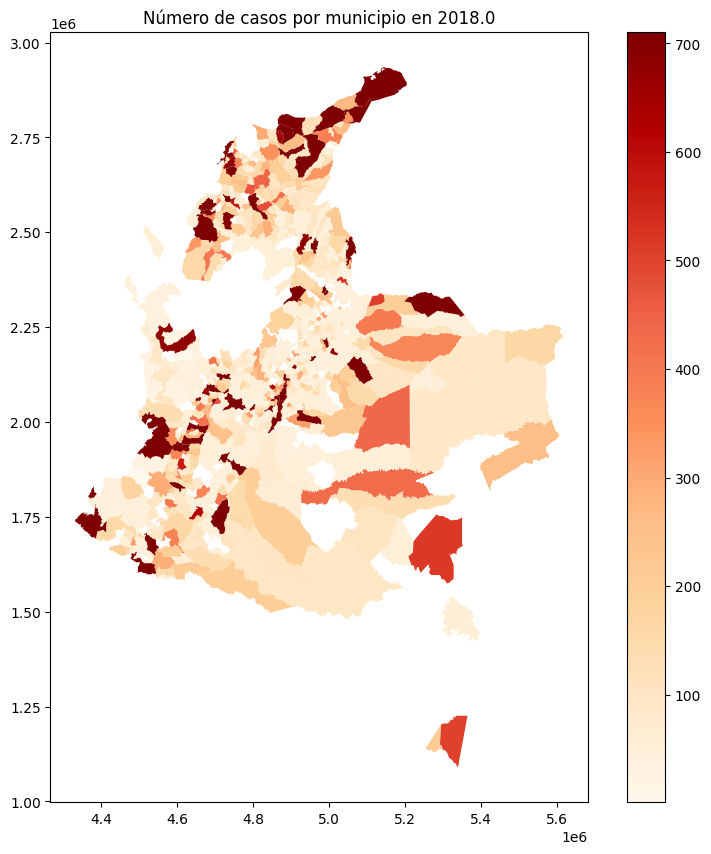

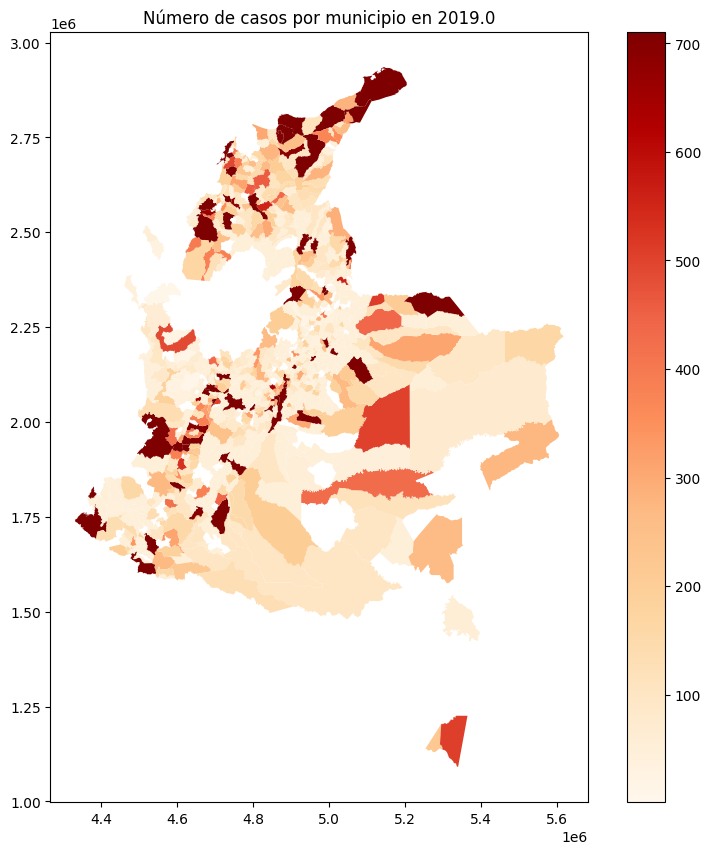

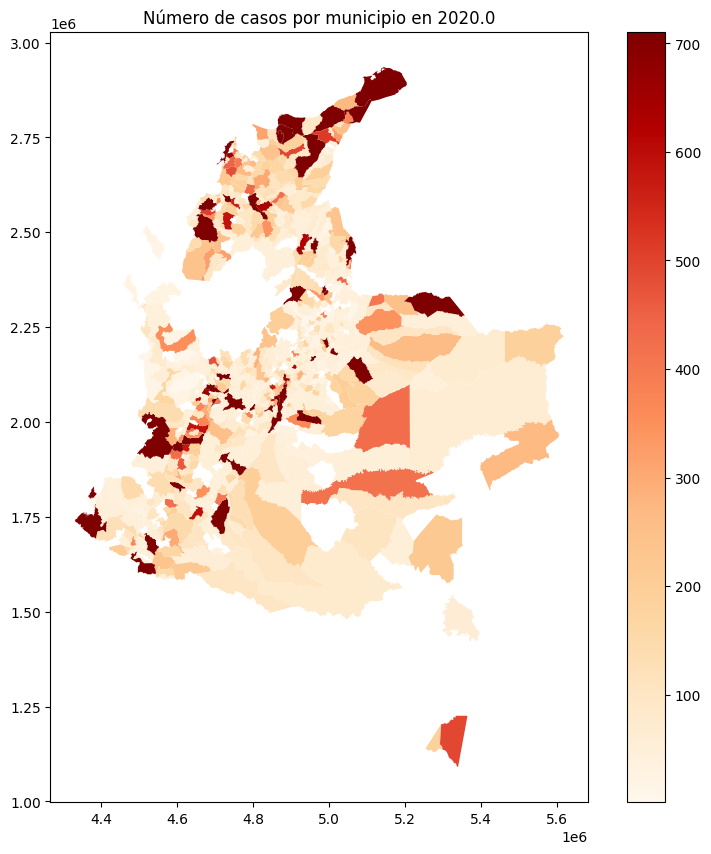

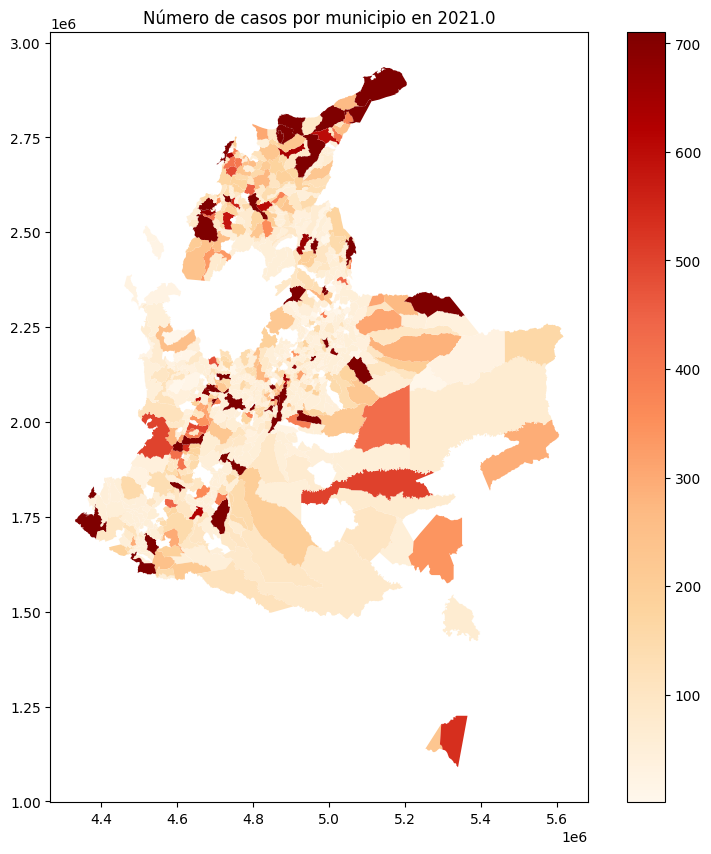

In [254]:
mapa = gpd.read_file(r"C:\Users\santi\Downloads\bases\Servicio-610\Municipios_202406_shp\Municipios_202406_shp\Municipio, Distrito y Área no municipalizada.shp")
df_unido["Código Entidad"] = df_unido["Código Entidad"].astype(str)
mapa["MpCodigo"] = mapa["MpCodigo"].astype(str)
import geopandas as gpd
import matplotlib.pyplot as plt
merged_data = mapa.merge(df_unido, left_on="MpCodigo", right_on="Código Entidad", how="left")
gdf = gpd.GeoDataFrame(merged_data, geometry="geometry")
# Filtrar datos para eliminar registros donde falta el año o el número de casos
gdf_filtered = gdf.dropna(subset=['Año', 'numero_de_casos'])

# Definir los límites de la escala de color
min_cases = gdf_filtered['numero_de_casos'].min()
max_cases = gdf_filtered['numero_de_casos'].quantile(0.95)  # Percentil 95% para evitar valores atípicos

for year in gdf_filtered['Año'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Filtrar por año específico
    yearly_data = gdf_filtered[gdf_filtered['Año'] == year]
    
    # Graficar el número de casos
    yearly_data.plot(
        column='numero_de_casos',
        cmap='OrRd',
        legend=True,
        ax=ax,
        vmin=min_cases,
        vmax=max_cases
    )
    
    # Título del mapa
    plt.title(f'Número de casos por municipio en {year}')
    plt.show()

##### Unión de casos por municipio y año con el código de cada municipio 

** Se corrigen códigos de municipios ya que no coincidian con los estipulados por el DANE y se elimina RIOQUITO por falta de datos relevantes para el modelo.

In [ ]:
import pandas as pd
import unicodedata

def normalize_string(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    ).replace('Ñ', 'N').replace('ñ', 'n')

casosmunicipio = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_por_municipio_y_año_final.xlsx")
datos2018 = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Datos_2018_995.xlsx")

datos2018_seleccionado = datos2018[['municipio', 'cod_mun', 'ndep_notif']]

datos2018_seleccionado.loc[datos2018_seleccionado['municipio'] == 'BARRANQUILLA', 'cod_mun'] = '8001'
datos2018_seleccionado.loc[datos2018_seleccionado['municipio'] == 'SANTA MARTA', 'cod_mun'] = '47001'
datos2018_seleccionado.loc[datos2018_seleccionado['municipio'] == 'CARTAGENA', 'cod_mun'] = '13001'

datos2018_seleccionado.loc[datos2018_seleccionado['ndep_notif'].isin(['ANTIOQUIA', 'ATLANTICO']), 'cod_mun'] = datos2018_seleccionado['cod_mun'].apply(lambda x: f"0{x}" if not str(x).startswith('0') else str(x))


casosmunicipio = casosmunicipio[casosmunicipio['municipio'] != 'RIOQUITO']

casosmunicipio = casosmunicipio.drop_duplicates(subset=['municipio', 'año'])
datos2018_seleccionado = datos2018_seleccionado.drop_duplicates(subset=['municipio'])

print("Tipo de datos de la columna 'cod_mun' en datos2018_seleccionado:")
print(datos2018_seleccionado['cod_mun'].dtype)

df_unido = pd.merge(casosmunicipio, datos2018_seleccionado, on='municipio', how='left')

print(df_unido.head())

output_file_path = "C:\\Users\\santi\\Downloads\\bases\\Casos_y_codigo.xlsx"
df_unido.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Tipo de datos de la columna 'cod_mun' en datos2018_seleccionado:
object
   municipio   año  numero_de_casos cod_mun       ndep_notif
0  ABEJORRAL  2018               52   05002        ANTIOQUIA
1  ABEJORRAL  2019               51   05002        ANTIOQUIA
2  ABEJORRAL  2020               52   05002        ANTIOQUIA
3  ABEJORRAL  2021               52   05002        ANTIOQUIA
4     ABREGO  2018               96   54003  NORTE SANTANDER
Archivo guardado en C:\Users\santi\Downloads\bases\Casos_y_codigo.xlsx


In [ ]:
poblacion['Código Entidad'] = poblacion['Código Entidad'].astype(object)

 Unión de casos por municipio y año, con la población de cada municipio.

In [ ]:
import pandas as pd

casoscodigo = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_y_codigo.xlsx")
poblacion = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Poblacion.xlsx")

casoscodigo.rename(columns={
    'municipio': 'Entidad',
    'cod_mun': 'Código Entidad',
    'ndep_notif': 'Departamento',
    'año': 'Año'
}, inplace=True)

poblacion['Código Entidad'] = poblacion['Código Entidad'].astype(object)

casoscodigo = casoscodigo[casoscodigo['Año'].isin([2018, 2019, 2020, 2021])]
poblacion = poblacion[poblacion['Año'].isin([2018, 2019, 2020, 2021])]


poblacion_seleccionado = poblacion[['Código Entidad', 'Año', 'Poblacion']]

df_unido = pd.merge(casoscodigo, poblacion_seleccionado, on=['Código Entidad', 'Año'], how='left')
df_unido = df_unido.drop_duplicates()



output_file_path = "C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_unidos.xlsx"
df_unido.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")


Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_unidos.xlsx


Eliminación de caceríos índigenas por falta de información socieconómica

In [ ]:
poblacion['Código Entidad'] = poblacion['Código Entidad'].astype(object)


casospoblacion = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_unidos.xlsx")
entidades_a_eliminar = [
    'BARRANCO MINAS (CD)', 'CACAHUAL (CD)', 'EL ENCANTO (CD)', 'LA CHORRERA (CD)', 'LA GUADALUPE (CD)', 
    'LA PEDRERA (CD)', 'LA VICTORIA (CD)', 'MAPIRIPANA (CD)', 'MIRITI PARANA (CD)', 'MORICHAL (MORICHAL NUEVO) (CD)', 
    'PACOA (CD)', 'PANA PANA (CAMPO ALEGRE) (CD)', 'PAPUNAUA (MORICHAL) (CD)', 'PUERTO ALEGRIA (CD)', 
    'PUERTO ARICA (CD)', 'PUERTO COLOMBIA (CD)', 'PUERTO SANTANDER (CD)', 'SAN FELIPE (CD)', 'TARAPACA (CD)', 
    'YAVARATE (CD)'
]
casospoblacion = casospoblacion[~casospoblacion['Entidad'].isin(entidades_a_eliminar)]

casospoblacion['Código Entidad'] = casospoblacion['Código Entidad'].astype(object)


output_file_path = "C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_final.xlsx"
casospoblacion.to_excel(output_file_path, index=False)

print("Tipo de datos de la columna 'Código Entidad' en casospoblacion:")
print(casospoblacion['Código Entidad'].dtype)

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_final.xlsx
Tipo de datos de la columna 'Código Entidad' en casospoblacion:
object


#####  Inclusión variables demográficas

Porcentaje población masculina por municipio

Porcentaje población femenina por municipio

Porcentaje población menor de 5 años

Porcentaje población mayor 60 años

Porcentaje población urbana

Densidad poblacional 

In [ ]:
import pandas as pd

casos_codigo_poblacion = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_final.xlsx")
poblacionhombres = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Población de hombres.xlsx")
poblacionmujeres = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Población de mujeres.xlsx")
poblacionde60años = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Población de 60 años y mas.xlsx")
poblacionurbana = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Poblacion urbana.xlsx")
poblacionniños = pd.read_excel(r"C:\Users\santi\Downloads\bases\Población hombres menores de 5 años.xlsx")
poblacionniñas = pd.read_excel(r"C:\Users\santi\Downloads\bases\Poblacion mujeres menores de 5 años.xlsx")


poblacionhombres = poblacionhombres.filter(regex='Poblacion|Código Entidad|Año')
poblacionmujeres = poblacionmujeres.filter(regex='Poblacion|Código Entidad|Año')
poblacionde60años = poblacionde60años.filter(regex='Poblacion|Código Entidad|Año')
poblacionurbana = poblacionurbana.filter(regex='Poblacion|Código Entidad|Año')
poblacionniños = poblacionniños.filter(regex='Poblacion|Código Entidad|Año')
poblacionniñas = poblacionniñas.filter(regex='Poblacion|Código Entidad|Año')



casos_codigo_poblacion['Código Entidad'] = casos_codigo_poblacion['Código Entidad'].astype(str)
poblacionhombres['Código Entidad'] = poblacionhombres['Código Entidad'].astype(str)
poblacionmujeres['Código Entidad'] = poblacionmujeres['Código Entidad'].astype(str)
poblacionde60años['Código Entidad'] = poblacionde60años['Código Entidad'].astype(str)
poblacionurbana['Código Entidad'] = poblacionurbana['Código Entidad'].astype(str)
poblacionniños['Código Entidad'] = poblacionniños['Código Entidad'].astype(str)
poblacionniñas['Código Entidad'] = poblacionniñas['Código Entidad'].astype(str)



df_unido = pd.merge(casos_codigo_poblacion, poblacionhombres, on=['Código Entidad', 'Año'], how='left')
df_unido = pd.merge(df_unido, poblacionmujeres, on=['Código Entidad', 'Año'], how='left')
df_unido = pd.merge(df_unido, poblacionde60años, on=['Código Entidad', 'Año'], how='left')
df_unido = pd.merge(df_unido, poblacionurbana, on=['Código Entidad', 'Año'], how='left')
df_unido = pd.merge(df_unido, poblacionniños, on=['Código Entidad', 'Año'], how='left')
df_unido = pd.merge(df_unido, poblacionniñas, on=['Código Entidad', 'Año'], how='left')

print(df_unido.head())

output_file_path = "C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_con_tasa_y_demograficas.xlsx"
df_unido.to_excel(output_file_path, index=False)



     Entidad   Año  numero_de_casos Código Entidad     Departamento  \
0  ABEJORRAL  2018               52           5002        ANTIOQUIA   
1  ABEJORRAL  2019               51           5002        ANTIOQUIA   
2  ABEJORRAL  2020               52           5002        ANTIOQUIA   
3  ABEJORRAL  2021               52           5002        ANTIOQUIA   
4     ABREGO  2018               96          54003  NORTE SANTANDER   

   Poblacion   Tasa IRA  Poblacion hombres  Poblacion mujeres  \
0      20367  25.531497              51.72              48.28   
1      20258  25.175239              51.88              48.12   
2      20823  24.972386              52.01              48.00   
3      20924  24.851845              52.07              47.93   
4      31786  30.201976              50.37              49.63   

   Poblacion 60 años  Poblacion urbana  Poblacion menores 5 añosh  \
0              17.99             37.68                       3.24   
1              18.59             38.39      

Creación porcentaje de menores de 5 años y adición de densidad poblacional

In [ ]:
Casosdemograficas = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_con_tasa_y_demograficas.xlsx")
densidadpob = pd.read_excel("C:\\Users\\santi\\Downloads\\bases\\Densidad poblacional.xlsx")


Casosdemograficas['Poblacion menores 5 años'] = Casosdemograficas['Poblacion menores 5 añosh'] + Casosdemograficas['Poblacion menores 5 añosm']

Casosdemograficas = Casosdemograficas.drop(columns=['Poblacion menores 5 añosh', 'Poblacion menores 5 añosm'])

Casosdemograficas['Código Entidad'] = Casosdemograficas['Código Entidad'].astype(str)
densidadpob['Código Entidad'] = densidadpob['Código Entidad'].astype(str)

Casosdemograficas['Año'] = Casosdemograficas['Año'].astype(int)
densidadpob['Año'] = densidadpob['Año'].astype(int)


df_final = pd.merge(Casosdemograficas, densidadpob[['Código Entidad', 'Año', 'Densidad poblacional']], on=['Código Entidad', 'Año'], how='left')
print(df_final.head())


output_file_path = "C:\\Users\\santi\\Downloads\\bases\\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad.xlsx"
df_final.to_excel(output_file_path, index=False)


     Entidad   Año  numero_de_casos Código Entidad     Departamento  \
0  ABEJORRAL  2018               52           5002        ANTIOQUIA   
1  ABEJORRAL  2019               51           5002        ANTIOQUIA   
2  ABEJORRAL  2020               52           5002        ANTIOQUIA   
3  ABEJORRAL  2021               52           5002        ANTIOQUIA   
4     ABREGO  2018               96          54003  NORTE SANTANDER   

   Poblacion   Tasa IRA  Poblacion hombres  Poblacion mujeres  \
0      20367  25.531497              51.72              48.28   
1      20258  25.175239              51.88              48.12   
2      20823  24.972386              52.01              48.00   
3      20924  24.851845              52.07              47.93   
4      31786  30.201976              50.37              49.63   

   Poblacion 60 años  Poblacion urbana  Poblacion menores 5 años  \
0              17.99             37.68                      6.52   
1              18.59             38.39        

Limpieza de datos demográficos

In [ ]:
import pandas as pd

Limpiezademograficas = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad.xlsx")

# Verificar qué variables tienen valores faltantes
valores_faltantes = Limpiezademograficas.isnull().sum()
print("Variables con valores faltantes:")
print(valores_faltantes[valores_faltantes > 0])


Variables con valores faltantes:
Poblacion 60 años    2
dtype: int64


** Dado que la población mayor no suele variar mucho de un año para otro, a los dos datos vacíos se les añadirá el dato del año inmediatamente anterior.

In [ ]:
Limpiezademograficas = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad.xlsx")


Limpiezademograficas = Limpiezademograficas.sort_values(by=['Código Entidad', 'Año'])
Limpiezademograficas['Poblacion 60 años'] = Limpiezademograficas.groupby('Código Entidad')['Poblacion 60 años'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)


valores_faltantes = Limpiezademograficas.isnull().sum()
print("Variables con valores faltantes después de la limpieza:")
print(valores_faltantes[valores_faltantes > 0])

output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad_limpio.xlsx"
Limpiezademograficas.to_excel(output_file_path, index=False)



Variables con valores faltantes después de la limpieza:
Series([], dtype: int64)


EDA Variables demográficas

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad_limpio.xlsx")

print("Primeras filas del DataFrame:")
print(demografia.head())

print("\nInformación general del DataFrame:")
print(demografia.info())

variables_interes = ['Poblacion', 'Poblacion hombres', 'Poblacion mujeres', 'Poblacion 60 años', 'Poblacion urbana', 'Poblacion menores 5 años', 'Densidad poblacional']
print("\nEstadísticas descriptivas de las variables de interés:")
print(demografia[variables_interes].describe())

print("\nValores faltantes en las variables de interés:")
print(demografia[variables_interes].isnull().sum())

Primeras filas del DataFrame:
     Entidad   Año  numero_de_casos  Código Entidad Departamento  Poblacion  \
0   MEDELLIN  2018             9345            5001    ANTIOQUIA    2427129   
1   MEDELLIN  2019             9593            5001    ANTIOQUIA    2483545   
2   MEDELLIN  2020             8390            5001    ANTIOQUIA    2519592   
3   MEDELLIN  2021             7916            5001    ANTIOQUIA    2549008   
4  ABEJORRAL  2018               52            5002    ANTIOQUIA      20367   

    Tasa IRA  Poblacion hombres  Poblacion mujeres  Poblacion 60 años  \
0  38.502280              47.00              53.00              14.57   
1  38.626238              47.07              52.93              15.04   
2  33.299042              47.08              52.92              15.53   
3  31.055218              47.09              52.91              15.95   
4  25.531497              51.72              48.28              17.99   

   Poblacion urbana  Poblacion menores 5 años  Densidad 

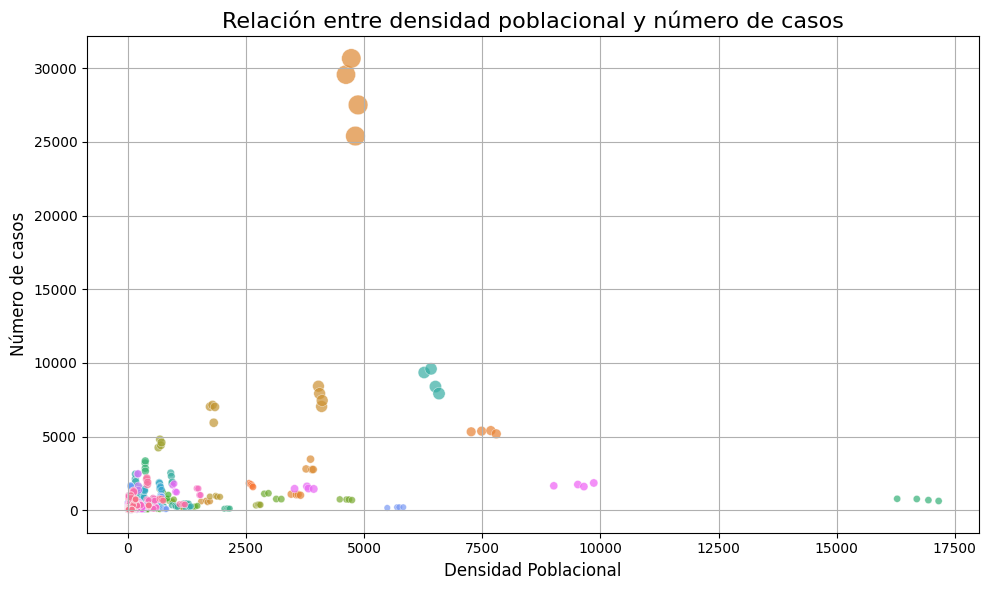

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Crear la gráfica sin leyenda
sns.scatterplot(
    data=demografia,
    x="Densidad poblacional",
    y="numero_de_casos",
    hue="Entidad",
    size="Poblacion",
    sizes=(20, 200),
    palette="husl",  # Paleta de colores distintivos
    alpha=0.7,
    legend=False  # Desactivar leyenda
)

# Títulos y etiquetas
plt.title("Relación entre densidad poblacional y número de casos", fontsize=16)
plt.xlabel("Densidad Poblacional", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

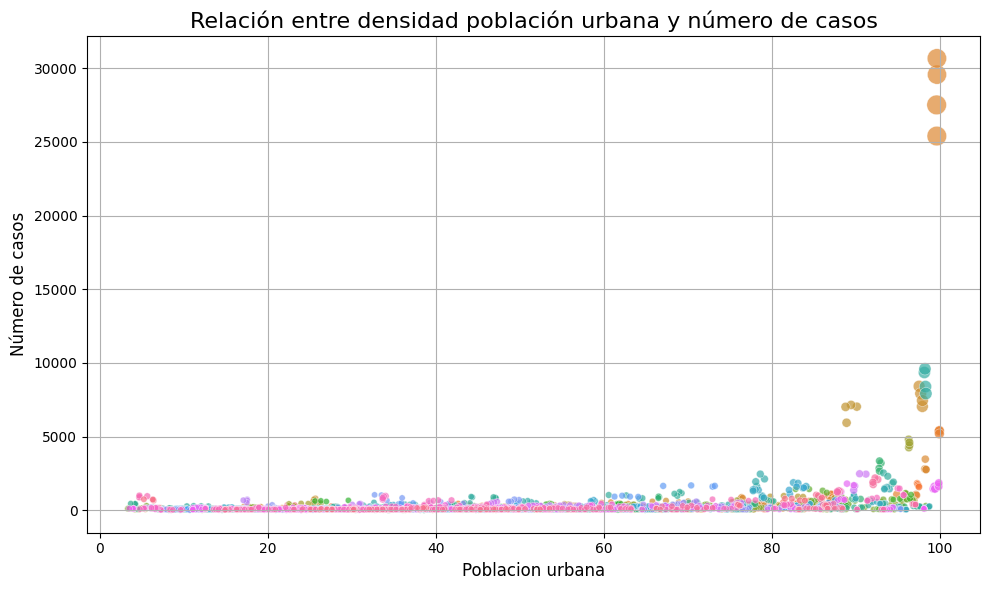

In [294]:
plt.figure(figsize=(10, 6))

# Crear la gráfica sin leyenda
sns.scatterplot(
    data=demografia,
    x="Poblacion urbana",
    y="numero_de_casos",
    hue="Entidad",
    size="Poblacion",
    sizes=(20, 200),
    palette="husl",  # Paleta de colores distintivos
    alpha=0.7,
    legend=False  # Desactivar leyenda
)

# Títulos y etiquetas
plt.title("Relación entre densidad población urbana y número de casos", fontsize=16)
plt.xlabel("Poblacion urbana", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

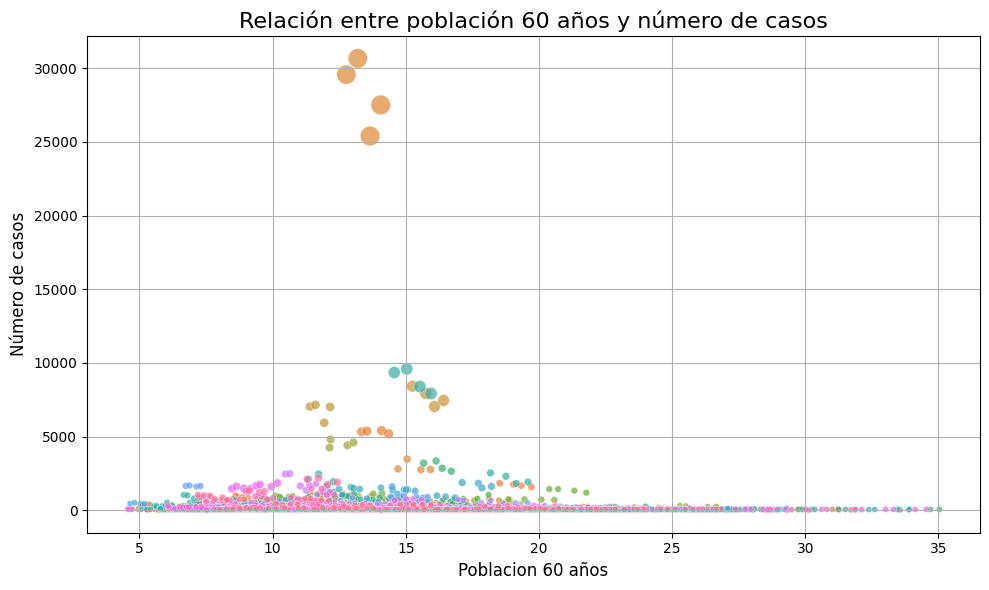

In [295]:
plt.figure(figsize=(10, 6))

# Crear la gráfica sin leyenda
sns.scatterplot(
    data=demografia,
    x="Poblacion 60 años",
    y="numero_de_casos",
    hue="Entidad",
    size="Poblacion",
    sizes=(20, 200),
    palette="husl",  # Paleta de colores distintivos
    alpha=0.7,
    legend=False  # Desactivar leyenda
)

# Títulos y etiquetas
plt.title("Relación entre población 60 años y número de casos", fontsize=16)
plt.xlabel("Poblacion 60 años", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

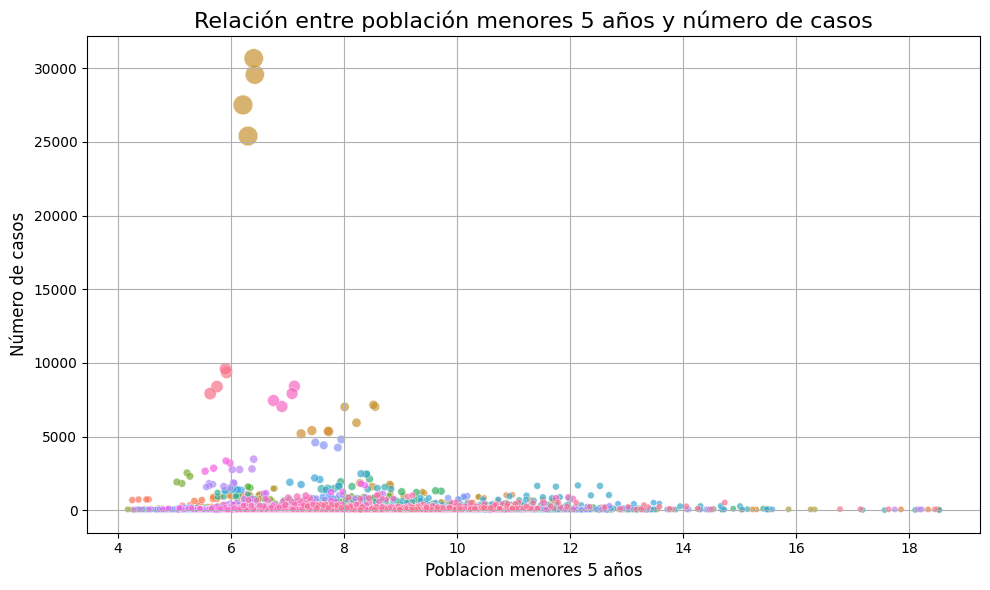

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datosdemo,
    x="Poblacion menores 5 años",
    y="numero_de_casos",
    hue="Entidad",
    size="Poblacion",
    sizes=(20, 200),
    palette="husl", 
    alpha=0.7,
    legend=False  
)

plt.title("Relación entre población menores 5 años y número de casos", fontsize=16)
plt.xlabel("Poblacion menores 5 años", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.grid()
plt.tight_layout()


plt.show()

##### Inclusión variables socieconómicas

Cobertura de alcantarillado y acueducto

Tasa de analfabetismo de 15 años y mas

Resultado en pruebas Saber (matemáticas y lectura crítica)

Cobertura educación secundaria

Cobertura régimen subsidiado

Acceso a servicios básicos

In [185]:
import pandas as pd

# Leer los archivos Excel
demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad_limpio.xlsx")
acueducto = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura acueducto.xlsx")
alcantarillado = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura alcantarillado.xlsx")
aseo = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura de aseo.xlsx")
serviciosbasicos = pd.read_excel(r"C:\Users\santi\Downloads\bases\Acceso servicios publicos.xlsx")
analfabetismo = pd.read_excel(r"C:\Users\santi\Downloads\bases\Tasa de analfabetismo de 15 años y mas.xlsx")
Matematicas = pd.read_excel(r"C:\Users\santi\Downloads\bases\Matematicas.xlsx")
Lectura = pd.read_excel(r"C:\Users\santi\Downloads\bases\Lectura critica.xlsx")
Regimensubsidiado = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura del regimen subsidiado.xlsx")
coberturasecundaria = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura educacion secundaria.xlsx")

In [ ]:
import pandas as pd

demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_densidad_limpio.xlsx")
acueducto = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura acueducto.xlsx")

demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

acueducto['Código Entidad'] = pd.to_numeric(acueducto['Código Entidad'], errors='coerce').fillna(0).astype('int64')
acueducto['Año'] = pd.to_numeric(acueducto['Año'], errors='coerce').fillna(0).astype('int64')

acueducto = acueducto.rename(columns={'Dato Numérico': 'Cobertura acueducto'})
acueducto = acueducto[['Código Entidad', 'Año', 'Cobertura acueducto']]

df_unido = pd.merge(demografia, acueducto, on=['Código Entidad', 'Año'], how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto.xlsx"
df_unido.to_excel(output_file_path, index=False)

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto.xlsx


In [ ]:
demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto.xlsx")
alcantarillado = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura alcantarillado.xlsx")

demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

alcantarillado['Código Entidad'] = pd.to_numeric(alcantarillado['Código Entidad'], errors='coerce').fillna(0).astype('int64')
alcantarillado['Año'] = pd.to_numeric(alcantarillado['Año'], errors='coerce').fillna(0).astype('int64')

alcantarillado = alcantarillado.rename(columns={'Dato Numérico': 'Cobertura alcantarillado'})

alcantarillado = alcantarillado[['Código Entidad', 'Año', 'Cobertura alcantarillado']]

df_unido = pd.merge(demografia, alcantarillado, on=['Código Entidad', 'Año'], how='left')

output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado.xlsx"
df_unido.to_excel(output_file_path, index=False)

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado.xlsx


In [ ]:
import pandas as pd

demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado.xlsx")
serviciosbasicos = pd.read_excel(r"C:\Users\santi\Downloads\bases\Acceso servicios publicos.xlsx")

demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

serviciosbasicos['Código Entidad'] = pd.to_numeric(serviciosbasicos['Código Entidad'], errors='coerce').fillna(0).astype('int64')
serviciosbasicos['Año'] = pd.to_numeric(serviciosbasicos['Año'], errors='coerce').fillna(0).astype('int64')

serviciosbasicos = serviciosbasicos.rename(columns={'Dato Numérico': 'Acceso servicios publicos'})
serviciosbasicos = serviciosbasicos[['Código Entidad', 'Año', 'Acceso servicios publicos']]


df_unido = pd.merge(demografia, serviciosbasicos, on=['Código Entidad', 'Año'], how='left')

output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos.xlsx"
df_unido.to_excel(output_file_path, index=False)


Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos.xlsx


In [ ]:
import pandas as pd

demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos.xlsx")
analfabetismo = pd.read_excel(r"C:\Users\santi\Downloads\bases\Tasa de analfabetismo de 15 años y mas.xlsx")

demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

analfabetismo['Código Entidad'] = pd.to_numeric(analfabetismo['Código Entidad'], errors='coerce').fillna(0).astype('int64')
analfabetismo['Año'] = pd.to_numeric(analfabetismo['Año'], errors='coerce').fillna(0).astype('int64')

analfabetismo = analfabetismo.rename(columns={'Dato Numérico': 'Tasa de analfabetismo'})

analfabetismo = analfabetismo[['Código Entidad', 'Año', 'Tasa de analfabetismo']]

df_unido = pd.merge(demografia, analfabetismo, on=['Código Entidad', 'Año'], how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo.xlsx"
df_unido.to_excel(output_file_path, index=False)

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo.xlsx


In [ ]:
demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo.xlsx")
Matematicas = pd.read_excel(r"C:\Users\santi\Downloads\bases\Matematicas.xlsx")

demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

Matematicas['Código Entidad'] = pd.to_numeric(Matematicas['Código Entidad'], errors='coerce').fillna(0).astype('int64')
Matematicas['Año'] = pd.to_numeric(Matematicas['Año'], errors='coerce').fillna(0).astype('int64')

Matematicas = Matematicas.rename(columns={'Dato Numérico': 'Matematicas'})

Matematicas = Matematicas[['Código Entidad', 'Año', 'Matematicas']]

df_unido = pd.merge(demografia, Matematicas, on=['Código Entidad', 'Año'], how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas.xlsx"
df_unido.to_excel(output_file_path, index=False)

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas.xlsx


In [ ]:
import pandas as pd

demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas.xlsx")
Lectura = pd.read_excel(r"C:\Users\santi\Downloads\bases\Lectura critica.xlsx")


demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

Lectura['Código Entidad'] = pd.to_numeric(Lectura['Código Entidad'], errors='coerce').fillna(0).astype('int64')
Lectura['Año'] = pd.to_numeric(Lectura['Año'], errors='coerce').fillna(0).astype('int64')


Lectura = Lectura.rename(columns={'Dato Numérico': 'Lectura critica'})
Lectura = Lectura[['Código Entidad', 'Año', 'Lectura critica']]


df_unido = pd.merge(demografia, Lectura, on=['Código Entidad', 'Año'], how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas_y_lectura.xlsx"
df_unido.to_excel(output_file_path, index=False)


Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas_y_lectura.xlsx


In [ ]:
demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas_y_lectura.xlsx")
coberturasecundaria = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura educacion secundaria.xlsx")


demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

coberturasecundaria['Código Entidad'] = pd.to_numeric(coberturasecundaria['Código Entidad'], errors='coerce').fillna(0).astype('int64')
coberturasecundaria['Año'] = pd.to_numeric(coberturasecundaria['Año'], errors='coerce').fillna(0).astype('int64')


coberturasecundaria = coberturasecundaria.rename(columns={'Dato Numérico': 'Cobertura educacion secundaria'})


coberturasecundaria = coberturasecundaria[['Código Entidad', 'Año', 'Cobertura educacion secundaria']]

df_unido = pd.merge(demografia, coberturasecundaria, on=['Código Entidad', 'Año'], how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas_y_lectura_y_coberturasecundaria.xlsx"
df_unido.to_excel(output_file_path, index=False)

Archivo guardado en C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas_y_lectura_y_coberturasecundaria.xlsx


##### Base de datos (Casos IRA, datos demográficos y socieconómicos)

In [ ]:
demografia = pd.read_excel(r"C:\Users\santi\Downloads\bases\Casos_codigo_poblacion_con_tasa_y_demograficas_con_acueducto_y_alcantarillado_y_serviciosbasicos_y_analfabetismo_y_matematicas_y_lectura_y_coberturasecundaria.xlsx")
Regimensubsidiado = pd.read_excel(r"C:\Users\santi\Downloads\bases\Cobertura del regimen subsidiado.xlsx")

demografia['Código Entidad'] = demografia['Código Entidad'].astype('int64')
demografia['Año'] = demografia['Año'].astype('int64')

Regimensubsidiado['Código Entidad'] = pd.to_numeric(Regimensubsidiado['Código Entidad'], errors='coerce').fillna(0).astype('int64')
Regimensubsidiado['Año'] = pd.to_numeric(Regimensubsidiado['Año'], errors='coerce').fillna(0).astype('int64')

Regimensubsidiado = Regimensubsidiado.rename(columns={'Dato Numérico': 'Cobertura regimen subsidiado'})
Regimensubsidiado = Regimensubsidiado[['Código Entidad', 'Año', 'Cobertura regimen subsidiado']]


df_unido = pd.merge(demografia, Regimensubsidiado, on=['Código Entidad', 'Año'], how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia.xlsx"
df_unido.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

poblacion_y_socioeconomia = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia.xlsx")
poblacion_y_socioeconomia

Archivo guardado en C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia.xlsx


,Entidad,Año,numero_de_casos,Código Entidad,Departamento,Poblacion,Tasa IRA,Poblacion hombres,Poblacion mujeres,Poblacion 60 años,...,Poblacion menores 5 años,Densidad poblacional,Cobertura acueducto,Cobertura alcantarillado,Acceso servicios publicos,Tasa de analfabetismo,Matematicas,Lectura critica,Cobertura educacion secundaria,Cobertura regimen subsidiado
0,MEDELLIN,2018,9345,5001,ANTIOQUIA,2427129,38.502280,47.00,53.00,14.57,...,5.92,6271.65,97.26,95.29,73.20,96.88,50.30,54.35,85.96,NaN
1,MEDELLIN,2019,9593,5001,ANTIOQUIA,2483545,38.626238,47.07,52.93,15.04,...,5.90,6417.43,96.78,95.45,73.46,97.96,50.30,53.52,88.40,99.67
2,MEDELLIN,2020,8390,5001,ANTIOQUIA,2519592,33.299042,47.08,52.92,15.53,...,5.75,6510.57,96.82,95.54,63.03,98.15,50.67,53.18,89.66,99.12
3,MEDELLIN,2021,7916,5001,ANTIOQUIA,2549008,31.055218,47.09,52.91,15.95,...,5.63,6586.58,96.88,95.61,74.52,96.94,49.80,53.83,88.93,99.28
4,ABEJORRAL,2018,52,5002,ANTIOQUIA,20367,25.531497,51.72,48.28,17.99,...,6.52,40.98,15.71,15.71,39.00,76.22,49.01,51.40,60.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,SANTA ROSALIA,2021,12,99624,VICHADA,4367,27.478818,51.61,48.39,7.95,...,8.29,2.16,0.00,0.00,4.74,89.98,45.20,46.70,63.87,99.08
4053,CUMARIBO,2018,90,99773,VICHADA,72691,12.381175,53.23,46.77,4.70,...,14.26,1.11,34.54,8.30,13.70,41.26,41.18,44.38,11.24,NaN
4054,CUMARIBO,2019,77,99773,VICHADA,76196,10.105517,53.14,46.86,4.95,...,13.76,1.16,22.68,10.75,6.08,41.95,42.23,42.81,11.69,94.22
4055,CUMARIBO,2020,63,99773,VICHADA,79122,7.962387,53.00,47.00,5.30,...,13.26,1.20,12.96,9.99,6.23,42.72,42.65,42.26,12.86,90.29


Limpieza datos socieconómicos

In [ ]:
Limpiezasocieconomicas = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia.xlsx")

valores_faltantes = Limpiezasocieconomicas.isnull().sum()
print("Variables con valores faltantes:")
print(valores_faltantes[valores_faltantes > 0])

Variables con valores faltantes:
Cobertura acueducto              146
Cobertura alcantarillado         146
Matematicas                        2
Lectura critica                    2
Cobertura regimen subsidiado    1022
dtype: int64


** Para manejar los datos faltantes en las coberturas de alcantarillado y acueducto, se optó por rellenar usando el promedio debido a la naturaleza estática de estas variables en el corto plazo. De la misma forma que para las pruebas estatales de Matemáticas y Lectura Crítica, ya que se mantiene la tendencia interna de los datos, en un sector que sus cambios estan asociados a reformas estructurales en el largo plazo.

** Eliminamos la variable de Cobertura regimen subsidiado por la dificultad de tratar la variable ante tantos datos NAs, y poca relevancia en la medida que la cobertura no garantiza calidad del servicio.

In [ ]:
Limpiezasocieconomicas = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia.xlsx")

valores_faltantes = Limpiezasocieconomicas.isnull().sum()
print("Variables con valores faltantes:")
print(valores_faltantes[valores_faltantes > 0])


for column in ['Cobertura acueducto', 'Cobertura alcantarillado', 'Matematicas', 'Lectura critica']:
    Limpiezasocieconomicas[column] = Limpiezasocieconomicas.groupby('Código Entidad')[column].transform(lambda x: x.fillna(x.mean()))

Limpiezasocieconomicas = Limpiezasocieconomicas.drop(columns=['Cobertura regimen subsidiado'])

valores_faltantes = Limpiezasocieconomicas.isnull().sum()
print("Variables con valores faltantes después de la limpieza:")
print(valores_faltantes[valores_faltantes > 0])

output_file_path = r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_limpio.xlsx"
Limpiezasocieconomicas.to_excel(output_file_path, index=False)

datosdemo= pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_limpio.xlsx")
datosdemo

Variables con valores faltantes:
Cobertura acueducto              146
Cobertura alcantarillado         146
Matematicas                        2
Lectura critica                    2
Cobertura regimen subsidiado    1022
dtype: int64
Variables con valores faltantes después de la limpieza:
Series([], dtype: int64)


,Entidad,Año,numero_de_casos,Código Entidad,Departamento,Poblacion,Tasa IRA,Poblacion hombres,Poblacion mujeres,Poblacion 60 años,Poblacion urbana,Poblacion menores 5 años,Densidad poblacional,Cobertura acueducto,Cobertura alcantarillado,Acceso servicios publicos,Tasa de analfabetismo,Matematicas,Lectura critica,Cobertura educacion secundaria
0,MEDELLIN,2018,9345,5001,ANTIOQUIA,2427129,38.502280,47.00,53.00,14.57,98.16,5.92,6271.65,97.26,95.29,73.20,96.88,50.30,54.35,85.96
1,MEDELLIN,2019,9593,5001,ANTIOQUIA,2483545,38.626238,47.07,52.93,15.04,98.23,5.90,6417.43,96.78,95.45,73.46,97.96,50.30,53.52,88.40
2,MEDELLIN,2020,8390,5001,ANTIOQUIA,2519592,33.299042,47.08,52.92,15.53,98.29,5.75,6510.57,96.82,95.54,63.03,98.15,50.67,53.18,89.66
3,MEDELLIN,2021,7916,5001,ANTIOQUIA,2549008,31.055218,47.09,52.91,15.95,98.34,5.63,6586.58,96.88,95.61,74.52,96.94,49.80,53.83,88.93
4,ABEJORRAL,2018,52,5002,ANTIOQUIA,20367,25.531497,51.72,48.28,17.99,37.68,6.52,40.98,15.71,15.71,39.00,76.22,49.01,51.40,60.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,SANTA ROSALIA,2021,12,99624,VICHADA,4367,27.478818,51.61,48.39,7.95,63.22,8.29,2.16,0.00,0.00,4.74,89.98,45.20,46.70,63.87
4053,CUMARIBO,2018,90,99773,VICHADA,72691,12.381175,53.23,46.77,4.70,3.98,14.26,1.11,34.54,8.30,13.70,41.26,41.18,44.38,11.24
4054,CUMARIBO,2019,77,99773,VICHADA,76196,10.105517,53.14,46.86,4.95,4.12,13.76,1.16,22.68,10.75,6.08,41.95,42.23,42.81,11.69
4055,CUMARIBO,2020,63,99773,VICHADA,79122,7.962387,53.00,47.00,5.30,4.27,13.26,1.20,12.96,9.99,6.23,42.72,42.65,42.26,12.86


EDA datos sociecónomicos


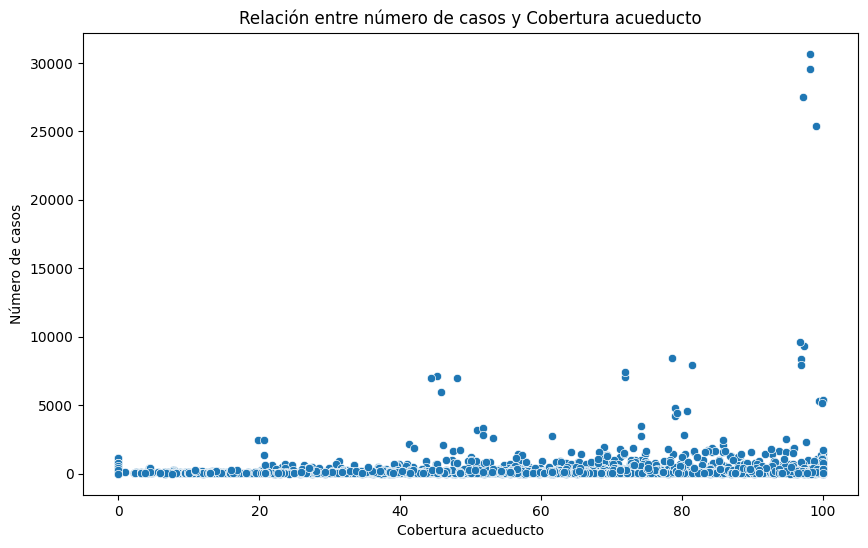

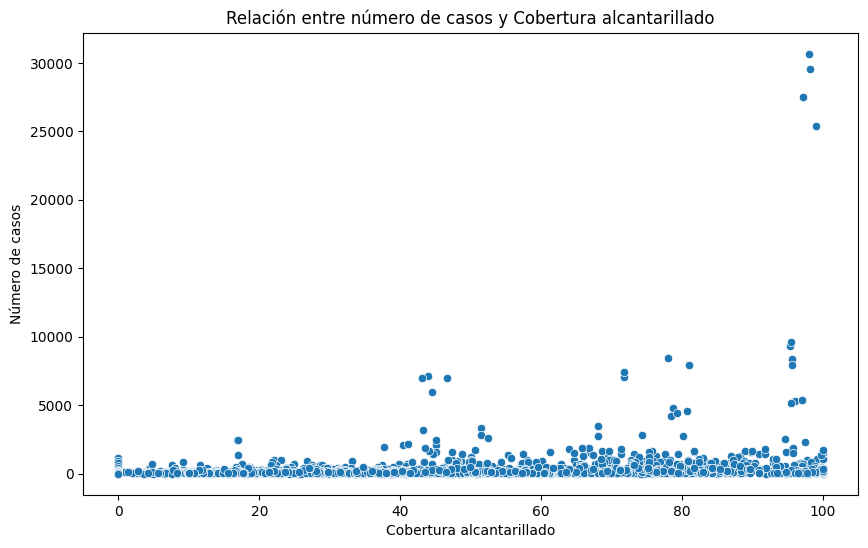

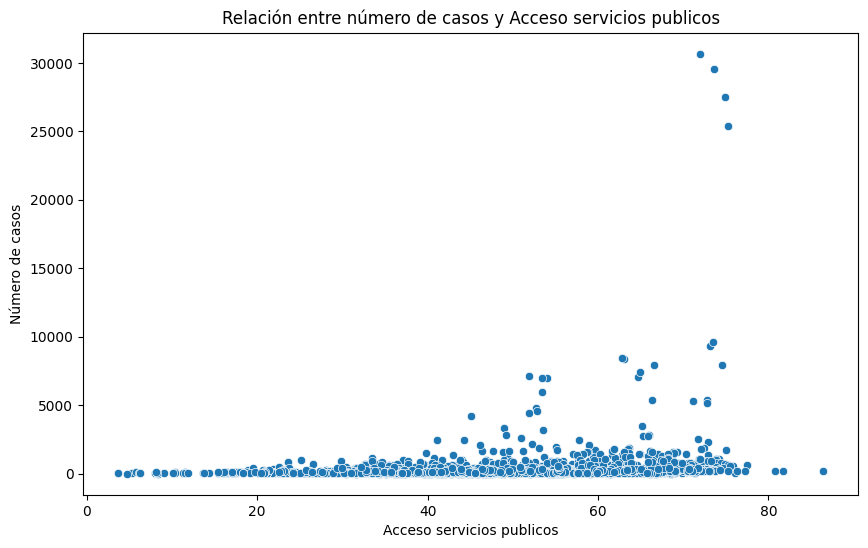

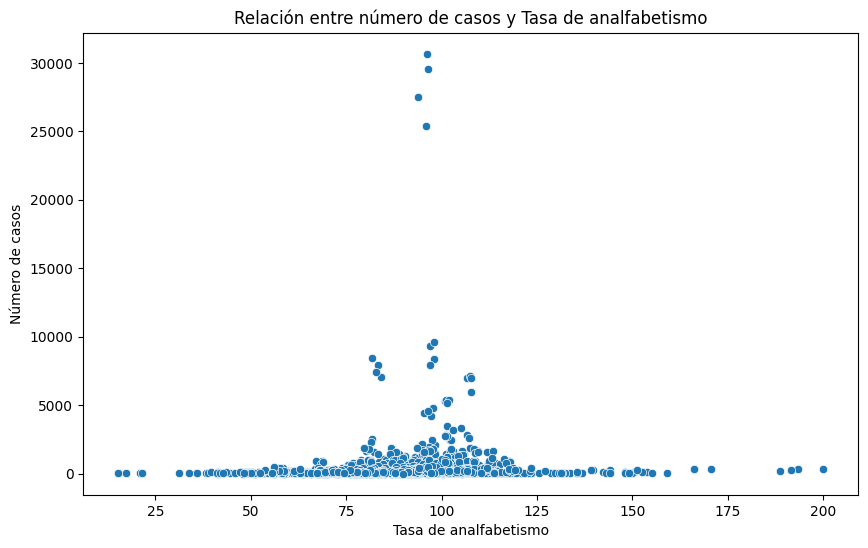

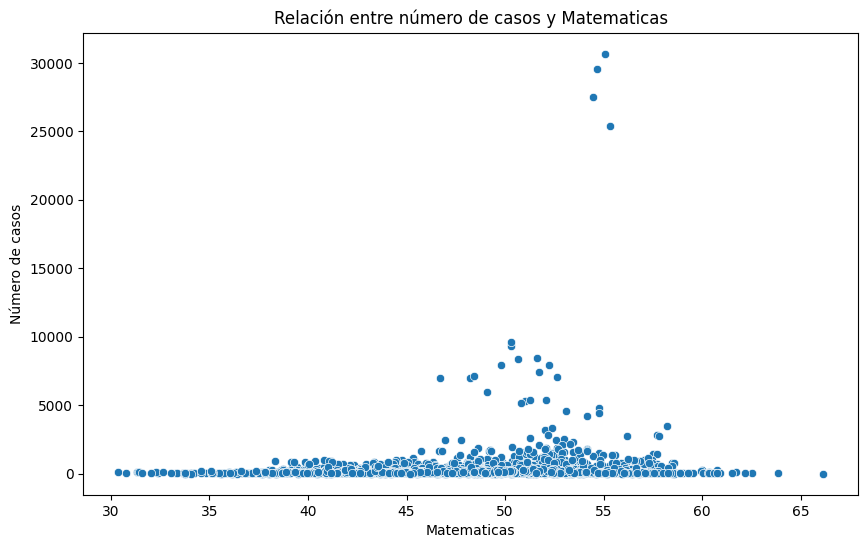

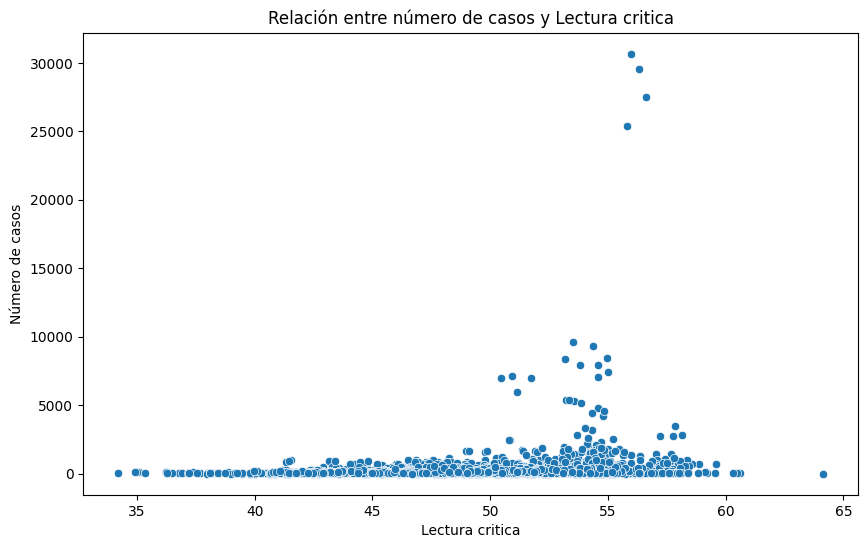

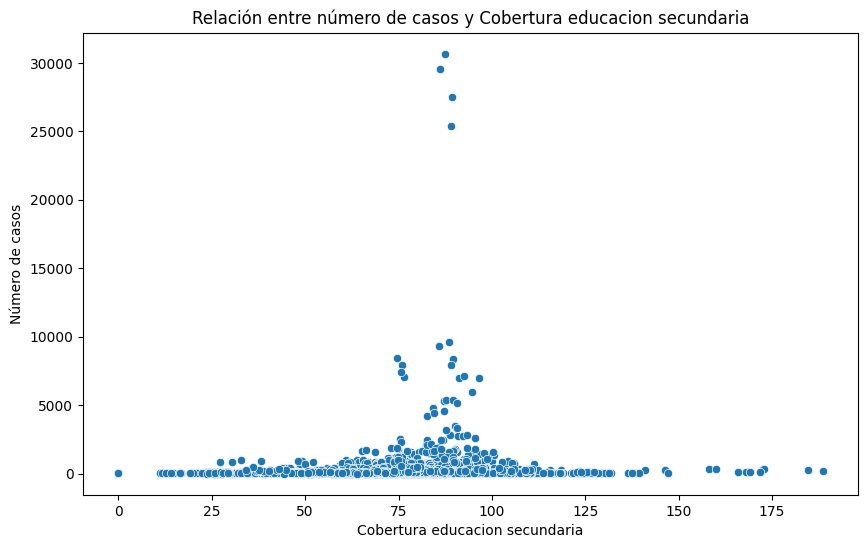

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
datosdemo = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_limpio.xlsx")

# Crear una lista de variables socioeconómicas
variables_socioeconomicas = [
    'Cobertura acueducto', 'Cobertura alcantarillado', 
    'Acceso servicios publicos', 'Tasa de analfabetismo', 'Matematicas', 
    'Lectura critica', 'Cobertura educacion secundaria'
]

# Crear gráficos de dispersión para cada variable socioeconómica
for variable in variables_socioeconomicas:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=datosdemo, x=variable, y='numero_de_casos')
    plt.title(f'Relación entre número de casos y {variable}')
    plt.xlabel(variable)
    plt.ylabel('Número de casos')
    plt.show()

##### Datos adicionales ambientales y de salud 

Area bosque

Porcentaje de niñas y niños en primera infancia con valoración integral de salud


In [ ]:
datosdemo = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_limpio.xlsx")
bosques = pd.read_excel(r"C:\Users\santi\Downloads\bases\Area bosque.xlsx")

datosdemo['Código Entidad'] = datosdemo['Código Entidad'].astype('int64')
bosques['Código Entidad'] = pd.to_numeric(bosques['Código Entidad'], errors='coerce').fillna(0).astype('int64')

bosques = bosques[['Código Entidad', 'Area bosque']]
bosques = bosques.drop_duplicates(subset=['Código Entidad'])

df_unido = pd.merge(datosdemo, bosques, on='Código Entidad', how='left')


output_file_path = r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_con_bosques.xlsx"
df_unido.to_excel(output_file_path, index=False)


     Entidad   Año  numero_de_casos  Código Entidad Departamento  Poblacion  \
0   MEDELLIN  2018             9345            5001    ANTIOQUIA    2427129   
1   MEDELLIN  2019             9593            5001    ANTIOQUIA    2483545   
2   MEDELLIN  2020             8390            5001    ANTIOQUIA    2519592   
3   MEDELLIN  2021             7916            5001    ANTIOQUIA    2549008   
4  ABEJORRAL  2018               52            5002    ANTIOQUIA      20367   

    Tasa IRA  Poblacion hombres  Poblacion mujeres  Poblacion 60 años  ...  \
0  38.502280              47.00              53.00              14.57  ...   
1  38.626238              47.07              52.93              15.04  ...   
2  33.299042              47.08              52.92              15.53  ...   
3  31.055218              47.09              52.91              15.95  ...   
4  25.531497              51.72              48.28              17.99  ...   

   Poblacion menores 5 años  Densidad poblacional  Cober

In [197]:
import pandas as pd

# Leer los archivos Excel
datademo2 = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_con_bosques.xlsx")
Saludintegral = pd.read_excel(r"C:\Users\santi\Downloads\bases\Porcentaje de niñas y niños en primera infancia con valoración integral de salud.xlsx")

# Convertir 'Código Entidad' y 'Año' a tipo int64 en ambos DataFrames
datademo2['Código Entidad'] = datademo2['Código Entidad'].astype('int64')
datademo2['Año'] = datademo2['Año'].astype('int64')

Saludintegral['Código Entidad'] = pd.to_numeric(Saludintegral['Código Entidad'], errors='coerce').fillna(0).astype('int64')
Saludintegral['Año'] = pd.to_numeric(Saludintegral['Año'], errors='coerce').fillna(0).astype('int64')

# Seleccionar solo la columna 'Código Entidad', 'Año' y 'Porcentaje de niñas y niños en primera infancia con valoración integral de salud' de Saludintegral
Saludintegral = Saludintegral[['Código Entidad', 'Año', 'Porcentaje de niñas y niños en primera infancia con valoración integral de salud']]

# Unión de DataFrames por las columnas 'Código Entidad' y 'Año'
df_unido = pd.merge(datademo2, Saludintegral, on=['Código Entidad', 'Año'], how='left')

# Mostrar las primeras filas del DataFrame unido para verificar el cambio
print(df_unido.head())

# Guardar el DataFrame unido en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\datosfinales.xlsx"
df_unido.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

     Entidad   Año  numero_de_casos  Código Entidad Departamento  Poblacion  \
0   MEDELLIN  2018             9345            5001    ANTIOQUIA    2427129   
1   MEDELLIN  2019             9593            5001    ANTIOQUIA    2483545   
2   MEDELLIN  2020             8390            5001    ANTIOQUIA    2519592   
3   MEDELLIN  2021             7916            5001    ANTIOQUIA    2549008   
4  ABEJORRAL  2018               52            5002    ANTIOQUIA      20367   

    Tasa IRA  Poblacion hombres  Poblacion mujeres  Poblacion 60 años  ...  \
0  38.502280              47.00              53.00              14.57  ...   
1  38.626238              47.07              52.93              15.04  ...   
2  33.299042              47.08              52.92              15.53  ...   
3  31.055218              47.09              52.91              15.95  ...   
4  25.531497              51.72              48.28              17.99  ...   

   Densidad poblacional  Cobertura acueducto  Cobertura 

In [198]:
import pandas as pd

# Leer el archivo Excel
datosfinales = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_con_bosques_y_saludintegral.xlsx")

# Verificar los tipos de datos de las variables en datosfinales
print("Tipos de datos de las variables en datosfinales:")
print(datosfinales.dtypes)

Tipos de datos de las variables en datosfinales:
Entidad                                                                              object
Año                                                                                   int64
numero_de_casos                                                                       int64
Código Entidad                                                                        int64
Departamento                                                                         object
Poblacion                                                                             int64
Tasa IRA                                                                            float64
Poblacion hombres                                                                   float64
Poblacion mujeres                                                                   float64
Poblacion 60 años                                                                   float64
Poblacion urbana               

In [201]:
datosfinales = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_con_bosques_y_saludintegral.xlsx")

# Convertir 'Código Entidad' a texto (str)
datosfinales['Código Entidad'] = datosfinales['Código Entidad'].astype(str)

# Limpiar y convertir 'Area bosque' a float64
datosfinales['Area bosque'] = datosfinales['Area bosque'].str.replace('.', '').str.replace(',', '.').astype('float64')

# Limpiar y convertir 'Porcentaje de niñas y niños en primera infancia con valoración integral de salud' a float64
datosfinales['Porcentaje de niñas y niños en primera infancia con valoración integral de salud'] = datosfinales['Porcentaje de niñas y niños en primera infancia con valoración integral de salud'].str.replace('.', '').str.replace(',', '.').astype('float64')

# Verificar los tipos de datos de las variables en datosfinales
print("Tipos de datos de las variables en datosfinales:")
print(datosfinales.dtypes)

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos.xlsx"
datosfinales.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Tipos de datos de las variables en datosfinales:
Entidad                                                                              object
Año                                                                                   int64
numero_de_casos                                                                       int64
Código Entidad                                                                       object
Departamento                                                                         object
Poblacion                                                                             int64
Tasa IRA                                                                            float64
Poblacion hombres                                                                   float64
Poblacion mujeres                                                                   float64
Poblacion 60 años                                                                   float64
Poblacion urbana               

## selectkbest

In [302]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Leer el archivo Excel
basededatos = pd.read_excel(r"C:\Users\santi\Downloads\bases\basededatos.xlsx")

# Convertir 'Código Entidad' a texto (str)
basededatos['Código Entidad'] = basededatos['Código Entidad'].astype(str)

# Limpiar y convertir 'Area bosque' a float64
basededatos['Area bosque'] = basededatos['Area bosque'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')

# Limpiar y convertir 'Porcentaje de niñas y niños en primera infancia con valoración integral de salud' a float64
basededatos['Porcentaje de niñas y niños en primera infancia con valoración integral de salud'] = basededatos['Porcentaje de niñas y niños en primera infancia con valoración integral de salud'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')

# Eliminar columnas no numéricas y la variable objetivo
X = basededatos.drop(columns=['numero_de_casos', 'Entidad', 'Departamento', 'Código Entidad'])
y = basededatos['numero_de_casos']

# Manejar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Mostrar las características seleccionadas
selected_features = X.columns[select_k_best.get_support()]
print("Características seleccionadas por SelectKBest:", selected_features)

Características seleccionadas por SelectKBest: Index(['Poblacion', 'Poblacion hombres', 'Poblacion mujeres',
       'Poblacion urbana', 'Densidad poblacional', 'Cobertura acueducto',
       'Cobertura alcantarillado', 'Acceso servicios publicos', 'Matematicas',
       'Lectura critica'],
      dtype='object')


## PCA

In [209]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=5)  # Elige el número de componentes principales que quieres conservar
X_pca = pca.fit_transform(X_scaled)

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente PCA:", pca.explained_variance_ratio_)

# Mostrar las componentes principales
print("Componentes principales:\n", pca.components_)

Varianza explicada por cada componente PCA: [0.24651841 0.15922735 0.07929897 0.07767215 0.07090822]
Componentes principales:
 [[ 0.01131023  0.1408798  -0.04507974 -0.31981974  0.31982535  0.13405459
   0.28135224 -0.26329681  0.19670574  0.22145925  0.23483134  0.35192207
   0.21459561  0.28102599  0.32476388  0.30030525 -0.13964945  0.00700047]
 [ 0.00434181 -0.11448548  0.22306494  0.18496562 -0.18496188  0.41460039
  -0.23986817 -0.34294819 -0.11827619 -0.29044474 -0.33616275 -0.1784724
   0.09258205  0.32938395  0.28204177  0.2478196  -0.11723144  0.08169238]
 [-0.25340278 -0.15028967  0.14535228  0.41950842 -0.41950204 -0.0845063
  -0.0396975   0.04252103 -0.13792094  0.40893697  0.36408113  0.27100421
   0.02016119  0.15699542  0.14202265  0.0244605   0.11148317  0.28120627]
 [-0.15620718 -0.15172611 -0.05855122 -0.00073521  0.00074597 -0.26852878
   0.07588312  0.25603787 -0.19111159 -0.08735673 -0.09062253 -0.12058128
   0.68950455 -0.13075726 -0.12317757  0.47544345 -0.06080

## REGRESIÓN LINEAL

In [210]:
from sklearn.model_selection import train_test_split
# División en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 2839 muestras
Tamaño del conjunto de prueba: 1218 muestras


In [242]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para la regresión lineal
pipeline_linear = Pipeline([
    ('linear', LinearRegression())
])

# Definir la cuadrícula de hiperparámetros para la regresión lineal
param_grid_linear = {
    'linear__fit_intercept': [True, False]
}

# Realizar la búsqueda de hiperparámetros para la regresión lineal
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros para la regresión lineal:", grid_search_linear.best_params_)
print("Mejor puntaje para la regresión lineal:", grid_search_linear.best_score_)

# Evaluar el modelo de regresión lineal en el conjunto de prueba
y_pred_linear = grid_search_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Rendimiento del modelo de regresión lineal en el conjunto de prueba: MSE = {mse_linear}, R² = {r2_linear}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores hiperparámetros para la regresión lineal: {'linear__fit_intercept': True}
Mejor puntaje para la regresión lineal: -52712.21418558814
Rendimiento del modelo de regresión lineal en el conjunto de prueba: MSE = 39390.78952171649, R² = 0.9760106685340382
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## POLINOMIAL

In [228]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Leer el archivo Excel
basededatos = pd.read_excel(r"C:\Users\santi\Downloads\bases\basededatos.xlsx")

# Convertir 'Código Entidad' a texto (str)
basededatos['Código Entidad'] = basededatos['Código Entidad'].astype(str)

# Limpiar y convertir 'Area bosque' a float64
basededatos['Area bosque'] = basededatos['Area bosque'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')

# Limpiar y convertir 'Porcentaje de niñas y niños en primera infancia con valoración integral de salud' a float64
basededatos['Porcentaje de niñas y niños en primera infancia con valoración integral de salud'] = basededatos['Porcentaje de niñas y niños en primera infancia con valoración integral de salud'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')

# Eliminar columnas no numéricas y la variable objetivo
X = basededatos.drop(columns=['numero_de_casos', 'Entidad', 'Departamento', 'Código Entidad'])
y = basededatos['numero_de_casos']

# Manejar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para la regresión lineal
pipeline_linear = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Definir la cuadrícula de hiperparámetros para la regresión lineal
param_grid_linear = {
    'poly__degree': [1, 2, 3],
    'linear__fit_intercept': [True, False]
}

# Realizar la búsqueda de hiperparámetros para la regresión lineal
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros para la regresión lineal:", grid_search_linear.best_params_)
print("Mejor puntaje para la regresión lineal:", grid_search_linear.best_score_)

# Evaluar el modelo de regresión lineal en el conjunto de prueba
y_pred_linear = grid_search_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Rendimiento del modelo de regresión lineal en el conjunto de prueba: MSE = {mse_linear}, R² = {r2_linear}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores hiperparámetros para la regresión lineal: {'linear__fit_intercept': True, 'poly__degree': 1}
Mejor puntaje para la regresión lineal: -52712.21418558791
Rendimiento del modelo de regresión lineal en el conjunto de prueba: MSE = 39390.78952171643, R² = 0.9760106685340383
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## LASSO

In [229]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score



# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Lasso regresión
pipeline_lasso = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Definir la cuadrícula de hiperparámetros para Lasso regresión
param_grid_lasso = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100],
    'lasso__max_iter': [1000, 5000, 10000]
}

# Realizar la búsqueda de hiperparámetros para Lasso regresión
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Lasso Regresión: {grid_search_lasso.best_params_}")
print(f"Mejor puntaje para Lasso Regresión: {grid_search_lasso.best_score_}")

# Evaluar el modelo de Lasso regresión en el conjunto de prueba
y_pred_lasso = grid_search_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Rendimiento del modelo de Lasso regresión en el conjunto de prueba: MSE = {mse_lasso}, R² = {r2_lasso}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para Lasso Regresión: {'lasso__alpha': 10, 'lasso__max_iter': 1000}
Mejor puntaje para Lasso Regresión: -52620.15880738129
Rendimiento del modelo de Lasso regresión en el conjunto de prueba: MSE = 41319.67688015755, R² = 0.9748359594519408
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## RIDGE

In [231]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Ridge regresión
pipeline_ridge = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Definir la cuadrícula de hiperparámetros para Ridge regresión
param_grid_ridge = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'ridge__max_iter': [1000, 5000, 10000]
}

# Realizar la búsqueda de hiperparámetros para Ridge regresión
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Ridge Regresión: {grid_search_ridge.best_params_}")
print(f"Mejor puntaje para Ridge Regresión: {grid_search_ridge.best_score_}")

# Evaluar el modelo de Ridge regresión en el conjunto de prueba
y_pred_ridge = grid_search_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Rendimiento del modelo de Ridge regresión en el conjunto de prueba: MSE = {mse_ridge}, R² = {r2_ridge}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para Ridge Regresión: {'ridge__alpha': 100, 'ridge__max_iter': 1000}
Mejor puntaje para Ridge Regresión: -52255.43976002219
Rendimiento del modelo de Ridge regresión en el conjunto de prueba: MSE = 44445.34880788953, R² = 0.9729323982174833
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## ELASTIC NET

In [232]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Elastic Net regresión
pipeline_elasticnet = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

# Definir la cuadrícula de hiperparámetros para Elastic Net regresión
param_grid_elasticnet = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10, 100],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1],
    'elasticnet__max_iter': [1000, 5000, 10000]
}

# Realizar la búsqueda de hiperparámetros para Elastic Net regresión
grid_search_elasticnet = GridSearchCV(pipeline_elasticnet, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
grid_search_elasticnet.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Elastic Net Regresión: {grid_search_elasticnet.best_params_}")
print(f"Mejor puntaje para Elastic Net Regresión: {grid_search_elasticnet.best_score_}")

# Evaluar el modelo de Elastic Net regresión en el conjunto de prueba
y_pred_elasticnet = grid_search_elasticnet.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print(f"Rendimiento del modelo de Elastic Net regresión en el conjunto de prueba: MSE = {mse_elasticnet}, R² = {r2_elasticnet}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para Elastic Net Regresión: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.7, 'elasticnet__max_iter': 1000}
Mejor puntaje para Elastic Net Regresión: -51991.53548363399
Rendimiento del modelo de Elastic Net regresión en el conjunto de prueba: MSE = 43465.30924268039, R² = 0.9735292507879706
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## KNN

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para KNN regresión
pipeline_knn_regressor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir la cuadrícula de hiperparámetros para KNN regresión
param_grid_knn_regressor = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de hiperparámetros para KNN regresión
grid_search_knn_regressor = GridSearchCV(pipeline_knn_regressor, param_grid_knn_regressor, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_regressor.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para KNN Regresión: {grid_search_knn_regressor.best_params_}")
print(f"Mejor puntaje para KNN Regresión: {grid_search_knn_regressor.best_score_}")

# Evaluar el modelo de KNN regresión en el conjunto de prueba
y_pred_knn = grid_search_knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Rendimiento del modelo de KNN regresión en el conjunto de prueba: MSE = {mse_knn}, R² = {r2_knn}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores hiperparámetros para la regresión lineal: {'linear__fit_intercept': True, 'poly__degree': 1}
Mejor puntaje para la regresión lineal: -47698.28389448147
Mejores parámetros para KNN Regresión: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Mejor puntaje para KNN Regresión: -36446.296594854015
Rendimiento del modelo de regresión lineal en el conjunto de prueba: MSE = 42750.73378397967, R² = 0.9811338668994586
Rendimiento del modelo de KNN regresión en el conjunto de prueba: MSE = 20659.10927652535, R² = 0.9908830218606537
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## ARBOLES DE DECISIÓN  

In [238]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Árboles de Decisión regresión
pipeline_decisiontree = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('decisiontree', DecisionTreeRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para Árboles de Decisión regresión
param_grid_decisiontree = {
    'decisiontree__max_depth': [None, 10, 20, 30],
    'decisiontree__min_samples_split': [2, 5, 10],
    'decisiontree__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros para Árboles de Decisión regresión
grid_search_decisiontree = GridSearchCV(pipeline_decisiontree, param_grid_decisiontree, cv=5, scoring='neg_mean_squared_error')
grid_search_decisiontree.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Árboles de Decisión Regresión: {grid_search_decisiontree.best_params_}")
print(f"Mejor puntaje para Árboles de Decisión Regresión: {grid_search_decisiontree.best_score_}")

# Evaluar el modelo de Árboles de Decisión regresión en el conjunto de prueba
y_pred_decisiontree = grid_search_decisiontree.predict(X_test)
mse_decisiontree = mean_squared_error(y_test, y_pred_decisiontree)
r2_decisiontree = r2_score(y_test, y_pred_decisiontree)
print(f"Rendimiento del modelo de Árboles de Decisión regresión en el conjunto de prueba: MSE = {mse_decisiontree}, R² = {r2_decisiontree}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para Árboles de Decisión Regresión: {'decisiontree__max_depth': 20, 'decisiontree__min_samples_leaf': 1, 'decisiontree__min_samples_split': 2}
Mejor puntaje para Árboles de Decisión Regresión: -44380.44862963108
Rendimiento del modelo de Árboles de Decisión regresión en el conjunto de prueba: MSE = 22842.222552821626, R² = 0.986088888928291
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## BAGGING

In [239]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Árboles de Decisión regresión
pipeline_decisiontree = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('decisiontree', DecisionTreeRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para Árboles de Decisión regresión
param_grid_decisiontree = {
    'decisiontree__max_depth': [None, 10, 20, 30],
    'decisiontree__min_samples_split': [2, 5, 10],
    'decisiontree__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros para Árboles de Decisión regresión
grid_search_decisiontree = GridSearchCV(pipeline_decisiontree, param_grid_decisiontree, cv=5, scoring='neg_mean_squared_error')
grid_search_decisiontree.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Árboles de Decisión Regresión: {grid_search_decisiontree.best_params_}")
print(f"Mejor puntaje para Árboles de Decisión Regresión: {grid_search_decisiontree.best_score_}")

# Evaluar el modelo de Árboles de Decisión regresión en el conjunto de prueba
y_pred_decisiontree = grid_search_decisiontree.predict(X_test)
mse_decisiontree = mean_squared_error(y_test, y_pred_decisiontree)
r2_decisiontree = r2_score(y_test, y_pred_decisiontree)
print(f"Rendimiento del modelo de Árboles de Decisión regresión en el conjunto de prueba: MSE = {mse_decisiontree}, R² = {r2_decisiontree}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para Árboles de Decisión Regresión: {'decisiontree__max_depth': 20, 'decisiontree__min_samples_leaf': 1, 'decisiontree__min_samples_split': 2}
Mejor puntaje para Árboles de Decisión Regresión: -44380.44862963108
Rendimiento del modelo de Árboles de Decisión regresión en el conjunto de prueba: MSE = 22842.222552821626, R² = 0.986088888928291
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## RANDOM FOREST

In [223]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




# Crear un pipeline para Random Forest regresión
pipeline_rf_regressor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para Random Forest regresión
param_grid_rf_regressor = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros para Random Forest regresión
grid_search_rf_regressor = GridSearchCV(pipeline_rf_regressor, param_grid_rf_regressor, cv=5, scoring='neg_mean_squared_error')
grid_search_rf_regressor.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Random Forest Regresión: {grid_search_rf_regressor.best_params_}")
print(f"Mejor puntaje para Random Forest Regresión: {grid_search_rf_regressor.best_score_}")


# Evaluar el modelo de Random Forest regresión en el conjunto de prueba
y_pred_rf = grid_search_rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Rendimiento del modelo de Random Forest regresión en el conjunto de prueba: MSE = {mse_rf}, R² = {r2_rf}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para Random Forest Regresión: {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Mejor puntaje para Random Forest Regresión: -122296.09439403526
Rendimiento del modelo de Random Forest regresión en el conjunto de prueba: MSE = 153653.97913472378, R² = 0.932191656956545
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## BOOSTING

In [224]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Gradient Boosting regresión
pipeline_boosting = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('boosting', GradientBoostingRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para Gradient Boosting regresión
param_grid_boosting = {
    'boosting__n_estimators': [100, 200, 300],
    'boosting__learning_rate': [0.01, 0.1, 0.2],
    'boosting__max_depth': [3, 4, 5],
    'boosting__min_samples_split': [2, 5, 10],
    'boosting__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros para Gradient Boosting regresión
grid_search_boosting = GridSearchCV(pipeline_boosting, param_grid_boosting, cv=5, scoring='neg_mean_squared_error')
grid_search_boosting.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Gradient Boosting Regresión: {grid_search_boosting.best_params_}")
print(f"Mejor puntaje para Gradient Boosting Regresión: {grid_search_boosting.best_score_}")

# Evaluar el modelo de Gradient Boosting regresión en el conjunto de prueba
y_pred_boosting = grid_search_boosting.predict(X_test)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)
print(f"Rendimiento del modelo de Gradient Boosting regresión en el conjunto de prueba: MSE = {mse_boosting}, R² = {r2_boosting}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para Gradient Boosting Regresión: {'boosting__learning_rate': 0.2, 'boosting__max_depth': 5, 'boosting__min_samples_leaf': 1, 'boosting__min_samples_split': 10, 'boosting__n_estimators': 300}
Mejor puntaje para Gradient Boosting Regresión: -36399.90633746429
Rendimiento del modelo de Gradient Boosting regresión en el conjunto de prueba: MSE = 15428.801198975145, R² = 0.99060372664324
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## ADA BOOST

In [233]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para AdaBoost regresión
pipeline_adaboost = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para AdaBoost regresión
param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1]
}

# Realizar la búsqueda de hiperparámetros para AdaBoost regresión
grid_search_adaboost = GridSearchCV(pipeline_adaboost, param_grid_adaboost, cv=5, scoring='neg_mean_squared_error')
grid_search_adaboost.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para AdaBoost Regresión: {grid_search_adaboost.best_params_}")
print(f"Mejor puntaje para AdaBoost Regresión: {grid_search_adaboost.best_score_}")

# Evaluar el modelo de AdaBoost regresión en el conjunto de prueba
y_pred_adaboost = grid_search_adaboost.predict(X_test)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print(f"Rendimiento del modelo de AdaBoost regresión en el conjunto de prueba: MSE = {mse_adaboost}, R² = {r2_adaboost}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para AdaBoost Regresión: {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 200}
Mejor puntaje para AdaBoost Regresión: -53895.5829511519
Rendimiento del modelo de AdaBoost regresión en el conjunto de prueba: MSE = 29097.43461092626, R² = 0.9822794106905162
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## GRADIENT BOOSTING

In [234]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para Gradient Boosting regresión
pipeline_gradientboosting = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('gradientboosting', GradientBoostingRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para Gradient Boosting regresión
param_grid_gradientboosting = {
    'gradientboosting__n_estimators': [100, 200, 300],
    'gradientboosting__learning_rate': [0.01, 0.1, 0.2],
    'gradientboosting__max_depth': [3, 4, 5],
    'gradientboosting__min_samples_split': [2, 5, 10],
    'gradientboosting__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros para Gradient Boosting regresión
grid_search_gradientboosting = GridSearchCV(pipeline_gradientboosting, param_grid_gradientboosting, cv=5, scoring='neg_mean_squared_error')
grid_search_gradientboosting.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para Gradient Boosting Regresión: {grid_search_gradientboosting.best_params_}")
print(f"Mejor puntaje para Gradient Boosting Regresión: {grid_search_gradientboosting.best_score_}")

# Evaluar el modelo de Gradient Boosting regresión en el conjunto de prueba
y_pred_gradientboosting = grid_search_gradientboosting.predict(X_test)
mse_gradientboosting = mean_squared_error(y_test, y_pred_gradientboosting)
r2_gradientboosting = r2_score(y_test, y_pred_gradientboosting)
print(f"Rendimiento del modelo de Gradient Boosting regresión en el conjunto de prueba: MSE = {mse_gradientboosting}, R² = {r2_gradientboosting}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para Gradient Boosting Regresión: {'gradientboosting__learning_rate': 0.2, 'gradientboosting__max_depth': 5, 'gradientboosting__min_samples_leaf': 1, 'gradientboosting__min_samples_split': 10, 'gradientboosting__n_estimators': 300}
Mejor puntaje para Gradient Boosting Regresión: -36399.90633746429
Rendimiento del modelo de Gradient Boosting regresión en el conjunto de prueba: MSE = 15428.801198975145, R² = 0.99060372664324
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## XGBoost

In [236]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 706.5 kB/s eta 0:02:57
   ---------------------------------------- 0.5/124.9 MB 706.5 kB/s eta 0:02:57
   ---------------------------------------- 0.8/124.9 MB 631.9 kB/s eta 0:03:17
   ---------------------------------------- 0.8/124.9 MB 631.9 kB/s eta 0:03:17
   ---------------------------------------- 0.8/124.9 MB 631.9 kB/s eta 0:03:17
   ---------------------------------------- 1.0/124.9 MB 549.4 kB/s eta 0:03:46
   --------------------

In [237]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para XGBoost regresión
pipeline_xgboost = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('xgboost', XGBRegressor(random_state=42))
])

# Definir la cuadrícula de hiperparámetros para XGBoost regresión
param_grid_xgboost = {
    'xgboost__n_estimators': [100, 200, 300],
    'xgboost__learning_rate': [0.01, 0.1, 0.2],
    'xgboost__max_depth': [3, 4, 5],
    'xgboost__min_child_weight': [1, 3, 5],
    'xgboost__subsample': [0.6, 0.8, 1.0],
    'xgboost__colsample_bytree': [0.6, 0.8, 1.0]
}

# Realizar la búsqueda de hiperparámetros para XGBoost regresión
grid_search_xgboost = GridSearchCV(pipeline_xgboost, param_grid_xgboost, cv=5, scoring='neg_mean_squared_error')
grid_search_xgboost.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para XGBoost Regresión: {grid_search_xgboost.best_params_}")
print(f"Mejor puntaje para XGBoost Regresión: {grid_search_xgboost.best_score_}")

# Evaluar el modelo de XGBoost regresión en el conjunto de prueba
y_pred_xgboost = grid_search_xgboost.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
print(f"Rendimiento del modelo de XGBoost regresión en el conjunto de prueba: MSE = {mse_xgboost}, R² = {r2_xgboost}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para XGBoost Regresión: {'xgboost__colsample_bytree': 1.0, 'xgboost__learning_rate': 0.2, 'xgboost__max_depth': 4, 'xgboost__min_child_weight': 1, 'xgboost__n_estimators': 300, 'xgboost__subsample': 1.0}
Mejor puntaje para XGBoost Regresión: -33895.989980895945
Rendimiento del modelo de XGBoost regresión en el conjunto de prueba: MSE = 261050.06018722942, R² = 0.8410182595252991
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


## SMV

In [226]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



# Manejar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Seleccionar las 10 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear un pipeline para SVM regresión
pipeline_svm = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Definir la cuadrícula de hiperparámetros para SVM regresión
param_grid_svm = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__degree': [2, 3, 4]
}

# Realizar la búsqueda de hiperparámetros para SVM regresión
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros para SVM Regresión: {grid_search_svm.best_params_}")
print(f"Mejor puntaje para SVM Regresión: {grid_search_svm.best_score_}")

# Evaluar el modelo de SVM regresión en el conjunto de prueba
y_pred_svm = grid_search_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"Rendimiento del modelo de SVM regresión en el conjunto de prueba: MSE = {mse_svm}, R² = {r2_svm}")

# Guardar el DataFrame actualizado en un nuevo archivo Excel
output_file_path = r"C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx"
basededatos.to_excel(output_file_path, index=False)

print(f"Archivo guardado en {output_file_path}")

Mejores parámetros para SVM Regresión: {'svr__C': 10, 'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Mejor puntaje para SVM Regresión: -51598.352085438215
Rendimiento del modelo de SVM regresión en el conjunto de prueba: MSE = 66562.02012850408, R² = 0.9594631541206762
Archivo guardado en C:\Users\santi\Downloads\bases\basededatos_actualizado.xlsx


### KERNEL

In [304]:
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Cargar los datos
datosdemo = pd.read_excel(r"C:\Users\santi\Downloads\bases\poblacion_y_socioeconomia_limpio.xlsx")

# Verificar los nombres de las columnas
print(datosdemo.columns)

# Ajustar los nombres de las columnas según la salida anterior
X = datosdemo[['Densidad poblacional', 'Cobertura acueducto', 'Cobertura alcantarillado', 
               'Acceso servicios publicos', 'Tasa de analfabetismo', 'Matematicas', 
               'Lectura critica', 'Cobertura educacion secundaria']]  # Ajustar según los nombres correctos
y = datosdemo['numero_de_casos']

# Manejar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Crear un modelo de Kernel Ridge Regression
kernel_ridge = KernelRidge()

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    'alpha': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Solo se usa si el kernel es 'poly'
    'gamma': np.logspace(-2, 2, 5)  # Solo se usa si el kernel es 'rbf' o 'sigmoid'
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(kernel_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros para Kernel Ridge Regression:", grid_search.best_params_)
print("Mejor puntaje para Kernel Ridge Regression:", grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Rendimiento del modelo de Kernel Ridge Regression en el conjunto de prueba: MSE = {mse}, R² = {r2}")

Index(['Entidad', 'Año', 'numero_de_casos', 'Código Entidad', 'Departamento',
       'Poblacion', 'Tasa IRA', 'Poblacion hombres', 'Poblacion mujeres',
       'Poblacion 60 años', 'Poblacion urbana', 'Poblacion menores 5 años',
       'Densidad poblacional', 'Cobertura acueducto',
       'Cobertura alcantarillado', 'Acceso servicios publicos',
       'Tasa de analfabetismo', 'Matematicas', 'Lectura critica',
       'Cobertura educacion secundaria'],
      dtype='object')
Mejores hiperparámetros para Kernel Ridge Regression: {'alpha': 10, 'degree': 2, 'gamma': np.float64(100.0), 'kernel': 'poly'}
Mejor puntaje para Kernel Ridge Regression: -554973.5074816386
Rendimiento del modelo de Kernel Ridge Regression en el conjunto de prueba: MSE = 1583463.7184756254, R² = 0.3012087833721758


In [306]:
modelos = ['LINEAL', 'POLINOMIAL', 'LASSO', 'RIDGE', 'ELASTIC NET', 'KNN','ARBOLES DE DECISION',  'BAGGING', 'RANDOM FOREST', 'BOOSTING', 'ADABOOST', 'GRADIENT BOOSTING', 'XGBOOST', 'SVM', 'KERNEL RIDGE']
mse = [39390.78, 39390.78, 41319.67, 44445.34,43465.30,20659.10,22842.22,22842.22,153653.97,15428.80,29097.43,15428.80,261050.06,66562.02,1583463.71]
r2 = [0.9760,0.9760,0.9748,0.9729,0.9735,0.9908,0.9860,0.9860,0.9321,0.9960,0.9822,0.9906,0.8410,0.9594,0.3012]

# Crear el DataFrame
df = pd.DataFrame({'Modelo': modelos, 'MSE': mse, 'R²': r2})

# Mostrar la tabla
print(df)

                 Modelo         MSE      R²
0                LINEAL    39390.78  0.9760
1            POLINOMIAL    39390.78  0.9760
2                 LASSO    41319.67  0.9748
3                 RIDGE    44445.34  0.9729
4           ELASTIC NET    43465.30  0.9735
5                   KNN    20659.10  0.9908
6   ARBOLES DE DECISION    22842.22  0.9860
7               BAGGING    22842.22  0.9860
8         RANDOM FOREST   153653.97  0.9321
9              BOOSTING    15428.80  0.9960
10             ADABOOST    29097.43  0.9822
11    GRADIENT BOOSTING    15428.80  0.9906
12              XGBOOST   261050.06  0.8410
13                  SVM    66562.02  0.9594
14         KERNEL RIDGE  1583463.71  0.3012
